In [119]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [120]:
count = 0 
dirs = os.listdir('data/')
for dir in dirs:
    files = list(os.listdir('data/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Alismatales Folder has 76 Images
Commelinales Folder has 70 Images
Ericales Folder has 80 Images
Laurales Folder has 82 Images
Ranunculales Folder has 82 Images
Images Folder has 390 Images


In [121]:
# import os
# import cv2
# import imghdr
# import numpy as np

# data_dir = 'data'
# image_exts = ['jpeg', 'jpg', 'png']

# def has_alpha_channel(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
#     if img is None:
#         return False
#     # Check if the image has an alpha channel
#     return img.shape[2] == 4 if len(img.shape) == 3 else False

# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#             elif has_alpha_channel(image_path):
#                 print('Image has transparency {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             print(e)


In [122]:
# import os

# def rename_files_in_directory(base_dir):
#     for root, dirs, files in os.walk(base_dir):
#         count = 1
#         for name in files:
#             file_extension = os.path.splitext(name)[1]  # Get file extension
#             new_name = f"{count}{file_extension}"
#             old_path = os.path.join(root, name)
#             new_path = os.path.join(root, new_name)
            
#             if os.path.exists(new_path):
#                 print(f"Skipped renaming {old_path} as {new_path} already exists")
#                 continue
#             os.rename(old_path, new_path)
#             print(f"Renamed {old_path} to {new_path}")
#             count += 1

# base_dir = 'data'  # Update this to your directory path
# rename_files_in_directory(base_dir)


In [123]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'data'
img_size = (160, 160)
batch_size = 32

# Get the list of all image filenames and corresponding labels
all_images = []
all_labels = []

for label in os.listdir(base_dir):
    label_dir = os.path.join(base_dir, label)
    if os.path.isdir(label_dir):
        label_images = [os.path.join(label_dir, filename) for filename in os.listdir(label_dir)]
        all_images.extend(label_images)
        all_labels.extend([label] * len(label_images))

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, all_labels, test_size=0.1, random_state=42, stratify=all_labels
)

# Print the number of samples in each set
print("Number of training samples:", len(train_images))
print("Number of validation samples:", len(val_images))

Number of training samples: 351
Number of validation samples: 39


In [124]:
# Data generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_df = pd.DataFrame({'filename': train_images, 'class': train_labels})
val_df = pd.DataFrame({'filename': val_images, 'class': val_labels})

train_ds = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 351 validated image filenames belonging to 5 classes.
Found 39 validated image filenames belonging to 5 classes.


In [125]:
print("Training file names:")
for filename in train_images:
    print(filename)

print("\nValidation file names:")
for filename in val_images:
    print(filename)

Training file names:
data\Ericales\76.jpg
data\Laurales\63.jpg
data\Alismatales\60.jpg
data\Laurales\55.jpeg
data\Alismatales\11.jpg
data\Ericales\69.jpg
data\Ericales\19.jpg
data\Alismatales\35.jpg
data\Alismatales\26.jpg
data\Ericales\44.jpeg
data\Ranunculales\1 (8).jpg
data\Ranunculales\1 (46).jpg
data\Laurales\1.jpeg
data\Laurales\64.jpg
data\Laurales\76.jpg
data\Commelinales\52.jpeg
data\Commelinales\44.jpg
data\Alismatales\22.jpg
data\Commelinales\9.jpg
data\Commelinales\40.jpg
data\Laurales\66.jpg
data\Commelinales\11.jpg
data\Laurales\74.jpeg
data\Commelinales\33.jpg
data\Commelinales\37.jpg
data\Alismatales\56.jpg
data\Ranunculales\1 (33).jpg
data\Ranunculales\1 (1).png
data\Alismatales\45.jpg
data\Laurales\41.jpg
data\Ericales\13.jpg
data\Alismatales\58.jpg
data\Commelinales\36.jpg
data\Alismatales\7.jpg
data\Laurales\5.jpeg
data\Ericales\65.jpg
data\Ericales\4.jpg
data\Ranunculales\1 (10).jpeg
data\Ranunculales\1 (69).jpg
data\Ericales\32.jpg
data\Laurales\28.jpeg
data\Alism

In [126]:
class_indices = train_ds.class_indices
family_names = list(class_indices.keys())
family_names

['Alismatales', 'Commelinales', 'Ericales', 'Laurales', 'Ranunculales']

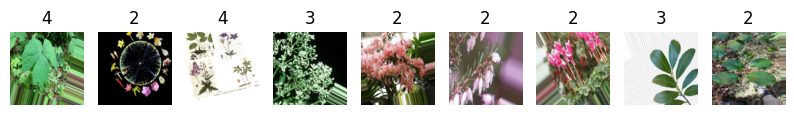

In [140]:
import matplotlib.pyplot as plt

# Function to plot images from a dataset
def plot_images(dataset, num_images):
    images, labels = next(dataset)  # Get a batch of images and labels
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis('off')
    plt.show()

# Display a batch of images from the training dataset
plot_images(train_ds, num_images=9)  # Adjust num_images as needed


In [134]:
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam

# # Load the MobileNetV2 model with pre-trained weights, excluding the top layers
# base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
# base_model.trainable = False  # Freeze the base model

# # Build the model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     BatchNormalization(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax')  # 5 classes for the output layer
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks for early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# # Train the model with initial frozen layers
# history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])

# # Unfreeze some layers of the base model for fine-tuning
# base_model.trainable = True

# # Compile the model again after unfreezing some layers
# model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model again for fine-tuning
# history_fine = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
11/11 [==============================] - 10s 663ms/step - loss: 2.4038 - accuracy: 0.2251 - val_loss: 2.0673 - val_accuracy: 0.3590 - lr: 0.0010
Epoch 2/10
11/11 [==============================] - 6s 569ms/step - loss: 1.5654 - accuracy: 0.4672 - val_loss: 1.7259 - val_accuracy: 0.5128 - lr: 0.0010
Epoch 3/10
11/11 [==============================] - 7s 621ms/step - loss: 1.2346 - accuracy: 0.5442 - val_loss: 1.4515 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 4/10
11/11 [==============================] - 7s 669ms/step - loss: 0.9468 - accuracy: 0.6581 - val_loss: 1.3133 - val_accuracy: 0.5128 - lr: 0.0010
Epoch 5/10
11/11 [==============================] - 6s 555ms/step - loss: 0.9274 - accuracy: 0.6496 - val_loss: 1.2895 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 6/10
11/11 [==============================] - 6s 591ms/step - loss: 0.8890 - accuracy: 0.6980 - val_loss: 1.3268 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 7/10
11/11 [==============================] - 6s 518ms/step - l

In [135]:
model.save('models/plantaev3.h5')

c:\Users\Ate Sheesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [136]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(160, 160))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0]).numpy()  # Convert tensor to NumPy array
    
    # Get the top 3 predictions
    top_3_indices = np.argsort(result)[-4:][::-1]
    top_3_scores = result[top_3_indices]
    
    outcome = "Top 3 matches:\n"
    for i in range(4):
        outcome += f"{i+1}. {family_names[top_3_indices[i]]} with a score of {top_3_scores[i] * 100:.2f}%\n"
    
    return outcome

In [137]:
print(classify_images('commelinales.png'))

1/1 [==============================] - 1s 685ms/step
Top 3 matches:
1. Ericales with a score of 23.71%
2. Laurales with a score of 21.96%
3. Ranunculales with a score of 19.61%
4. Commelinales with a score of 17.52%

